In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

In [2]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [3]:
import time

import numpy as np
import pandas as pd

from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from src.utils import eval_model, scale
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import seaborn as sns


mae = 'neg_mean_absolute_error'
mse = 'neg_mean_squared_error'
rmse = 'neg_root_mean_squared_error'
roc_auc = 'neg_roc_auc_score'
N_JOBS = 24
RANDOM_SEED = 42

# prepare models
models = {}

models['LR'] = LogisticRegression()

models['Ridge'] = RidgeClassifier()

models['DT'] = DecisionTreeClassifier(random_state=RANDOM_SEED)

# models['Lasso'] = Lass()

models['KNN'] = KNeighborsClassifier(n_jobs=N_JOBS)

models['SVC'] = SVC()

models['RF'] = RandomForestClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS)

models['HistGB'] = HistGradientBoostingClassifier(random_state=RANDOM_SEED)

models['XGB'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0,)

models['XGB_GPU'] = xgb.XGBClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbosity=0, 
                                  tree_method='gpu_hist', predictor='gpu_predictor', gpu_id=1)

models['CB'] = cb.CatBoostClassifier(iterations=400, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False)

models['CB_GPU'] = cb.CatBoostClassifier(iterations=400, random_seed=RANDOM_SEED, thread_count=N_JOBS, verbose=False, task_type="GPU")

models['LGB'] = lgb.LGBMClassifier(random_state=RANDOM_SEED, n_jobs=N_JOBS, verbose=-1)

# Stacked datasets

     LR: 0.841    (0.848 ± 0.007)    10.4s
  Ridge: 0.798    (0.805 ± 0.007)    5.3s
     DT: 0.739    (0.747 ± 0.008)    72.9s
    KNN: 0.822    (0.829 ± 0.006)    3.6s
    SVC: 0.873    (0.881 ± 0.009)    527.2s
     RF: 0.868    (0.876 ± 0.007)    6.1s
 HistGB: 0.895    (0.902 ± 0.006)    107.9s
    XGB: 0.893    (0.900 ± 0.007)    63.7s
XGB_GPU: 0.892    (0.901 ± 0.008)    33.6s
     CB: 0.893    (0.899 ± 0.007)    134.7s
 CB_GPU: 0.890    (0.899 ± 0.008)    38.2s
    LGB: 0.897    (0.904 ± 0.006)    22.9s


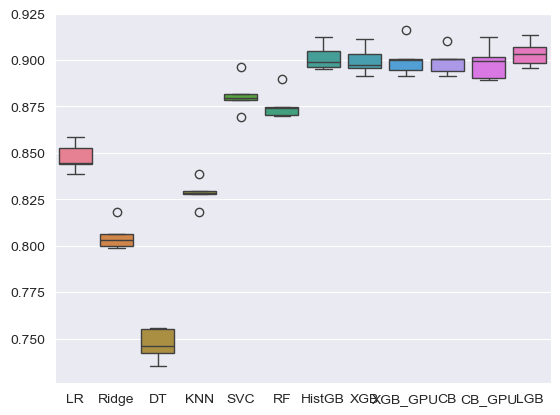

In [4]:
X = pd.read_pickle('../data/processed/X_train.pkl.zip')
y = pd.read_pickle('../data/processed/y_train.pkl')

results = {}

for name, model in models.items():
    X = scale(X)
    results[name] = eval_model(name, model, X, y)
    
results = pd.DataFrame(results)
sns.boxplot(results);

In [ ]:
X = pd.read_pickle('../data/processed/X_train_uncorr.pkl.zip')
y = pd.read_pickle('../data/processed/y_train.pkl')

results = {}

for name, model in models.items():
    X = scale(X)
    results[name] = eval_model(name, model, X, y)
    
results = pd.DataFrame(results)
sns.boxplot(results);

     LR: 0.837    (0.843 ± 0.006)    8.3s
  Ridge: 0.799    (0.806 ± 0.006)    3.9s
     DT: 0.736    (0.745 ± 0.008)    44.8s
    KNN: 0.822    (0.831 ± 0.009)    2.5s


In [ ]:
# X = pd.read_pickle('../data/processed/X_train_1.pkl.zip')
# y = pd.read_pickle('../data/processed/y_train_1.pkl')
# 
# results = {}
# 
# for name, model in models.items():
#     X = scale(X)
#     results[name] = eval_model(name, model, X, y)
#     
# results = pd.DataFrame(results)
# sns.boxplot(results);

In [ ]:
# X = pd.read_pickle('../data/processed/X_train_2.pkl.zip')
# y = pd.read_pickle('../data/processed/y_train_2.pkl')
# 
# results = {}
# 
# for name, model in models.items():
#     results[name] = eval_model(name, model, X, y)
#     
# results = pd.DataFrame(results)
# sns.boxplot(results);

In [ ]:
# X = pd.read_pickle('../data/processed/X_train_3.pkl.zip')
# y = pd.read_pickle('../data/processed/y_train_3.pkl')
# 
# results = {}
# 
# for name, model in models.items():
#     results[name] = eval_model(name, model, X, y)
#     
# results = pd.DataFrame(results)
# sns.boxplot(results);